# Logistic Regression

## SetUp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

%matplotlib inline

sns.set_style('white')
sns.set_context('paper', font_scale=1.5)

## Import Data

In [2]:
data = pd.read_csv(".\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Drop the useless info

In [3]:
data.info() # 400 datasets in total, no missing values
data.describe()
data.drop(columns=['User ID'], inplace=True)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## Adjust Data

In [4]:
# Use get_dummies for one-hot encoding (encode female and male as 0/1 and keep the male column only)
data['Male'] = pd.get_dummies(data.Gender, drop_first=True)
data.drop(columns=["Gender"], inplace=True)

## ToDo: How to make sure there isn't outliers - box plot

## Explore Data Features
use seaborn

<AxesSubplot:xlabel='Male', ylabel='count'>

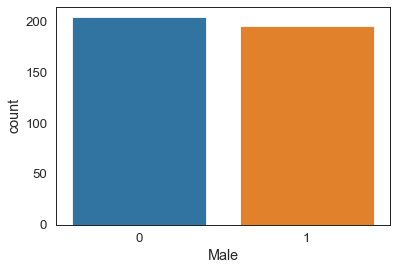

In [5]:
data.head()

# Gender
sns.countplot(x='Male', data=data)

Male (=1) and Female(=0) are evenly distributed.

The mean of Estimated Salary is 37.66


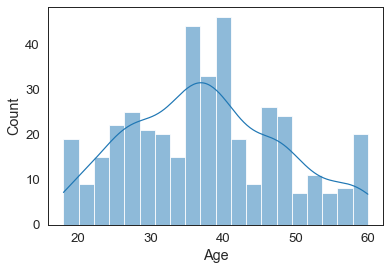

In [6]:
# Age
sns.histplot(data.Age, kde=True, bins=20)
print('The mean of Estimated Salary is %.2f' %(data.Age.mean()))

Age distribution is alike a Guassian distribution.

The mean of Estimated Salary is $69742.50


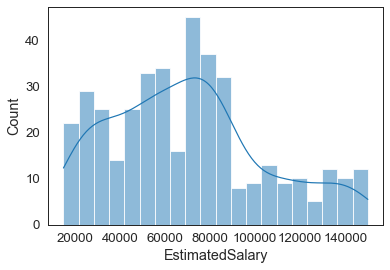

In [7]:
# Estimate Salary
sns.histplot(data.EstimatedSalary, kde=True, bins=20)
print('The mean of Estimated Salary is $%.2f' %(data.EstimatedSalary.mean()))

In [8]:
# # Estimated Salary for different genders and ages
# plt.figure(figsize=(20,10))
# sns.stripplot(x='Age', y='EstimatedSalary', data=data, jitter=True, hue='Male', palette='Blues')

## Normalized/Scale the Data

In [9]:
# Age
data.Age = (data.Age - data.Age.min()) / (data.Age.max() - data.Age.min())
data.EstimatedSalary = (data.EstimatedSalary - data.EstimatedSalary.min()) / (data.EstimatedSalary.max() - data.EstimatedSalary.min())
data.describe()

,Age,EstimatedSalary,Purchased,Male
count,400.000000,400.000000,400.000000,400.000000
mean,0.467976,0.405500,0.357500,0.490000
std,0.249592,0.252570,0.479864,0.500526
min,0.000000,0.000000,0.000000,0.000000
25%,0.279762,0.207407,0.000000,0.000000
50%,0.452381,0.407407,0.000000,0.000000
75%,0.666667,0.540741,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


# Logistic Regression

### Split the Train and Test Sets

In [10]:
features = ['Age', 'EstimatedSalary', 'Male']
X = data[features]
y = data.Purchased
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2) # add (random_state=int) can make it return the same results each time calling it


### Modeling

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predic_y = lr.predict(X_test)
accu_score = accuracy_score(y_test, predic_y)
report = classification_report(y_test, predic_y)
print(accu_score)
print(report)

0.8625
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        52
           1       0.95      0.64      0.77        28

    accuracy                           0.86        80
   macro avg       0.89      0.81      0.83        80
weighted avg       0.88      0.86      0.85        80



In [12]:
y_predict_proba = lr.predict_proba(X_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_predict_proba)
print(auc(fpr, tpr))

0.9601648351648351


## ToDo: Select Features for better performance

## ToDo: Model evaluation based on K-fold cross-validation

## ToDo: GridSearchCV to find the best params

# SVM